### Задание 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

In [4]:
# Стандартизация признаков
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return

In [7]:
# Расчет методом градиентного спуска с L2 регуляризацией
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.rand(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = reg * W
        W -= eta * dQ + dReg
    return W    

In [8]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)
W

array([37.56189575,  6.08846253, -1.9985846 , 11.01461736])

In [9]:
lambda_array = np.logspace(-10, 0, 100)
lambda_array

array([1.00000000e-10, 1.26185688e-10, 1.59228279e-10, 2.00923300e-10,
       2.53536449e-10, 3.19926714e-10, 4.03701726e-10, 5.09413801e-10,
       6.42807312e-10, 8.11130831e-10, 1.02353102e-09, 1.29154967e-09,
       1.62975083e-09, 2.05651231e-09, 2.59502421e-09, 3.27454916e-09,
       4.13201240e-09, 5.21400829e-09, 6.57933225e-09, 8.30217568e-09,
       1.04761575e-08, 1.32194115e-08, 1.66810054e-08, 2.10490414e-08,
       2.65608778e-08, 3.35160265e-08, 4.22924287e-08, 5.33669923e-08,
       6.73415066e-08, 8.49753436e-08, 1.07226722e-07, 1.35304777e-07,
       1.70735265e-07, 2.15443469e-07, 2.71858824e-07, 3.43046929e-07,
       4.32876128e-07, 5.46227722e-07, 6.89261210e-07, 8.69749003e-07,
       1.09749877e-06, 1.38488637e-06, 1.74752840e-06, 2.20513074e-06,
       2.78255940e-06, 3.51119173e-06, 4.43062146e-06, 5.59081018e-06,
       7.05480231e-06, 8.90215085e-06, 1.12332403e-05, 1.41747416e-05,
       1.78864953e-05, 2.25701972e-05, 2.84803587e-05, 3.59381366e-05,
      

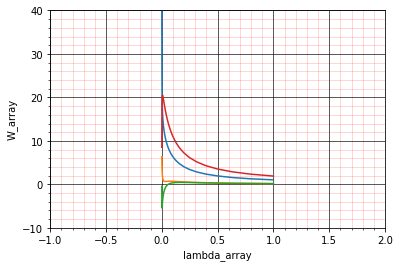

In [10]:
W_array = []

for lambda_ in lambda_array:
    W_temp = gradient_descent_reg_l2(X_st, y, iterations=7500, eta=1e-2, reg=lambda_)
    W_array.append(W_temp)
    
W_array = np.array(W_array)

for i in range(len(W_array[0])):
    plt.plot(lambda_array, W_array[:, i])
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_array')
plt.ylabel('W_array')
plt.ylim(-10, 40)
plt.xlim(-1, 2)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.8)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()    

### Задание 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

#### Возможно применить нормализацию и стандартизацию последовательно. 
#### Но не нужно использовать одновременно стандартизацию и нормализацию для изменения масштаба данных, нужно использовать нормализацию, когда набор данных не следует нормальному распределению, и использовать стандартизацию, когда набор данных следует нормальному распределению.

### Задание 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = reg * np.sign(W)
        W -= eta * dQ + dReg
    return W

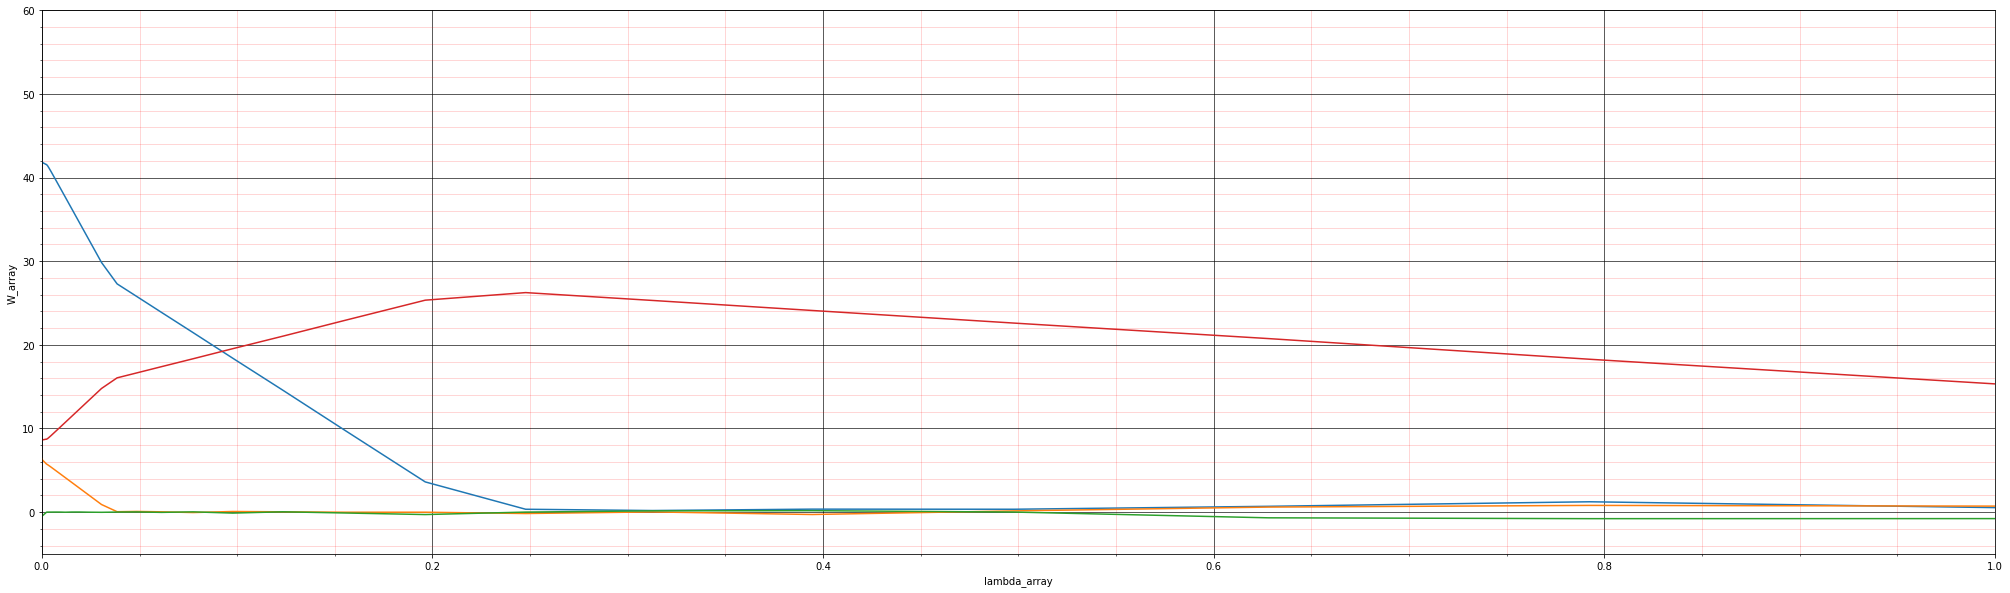

In [12]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)
lambda_array = np.logspace(-10, 0, 100)
W_array = []

for lambda_ in lambda_array:
    W_temp = gradient_descent_reg_l1(X_st, y, iterations=7500, eta=1e-2, reg=lambda_)
    W_array.append(W_temp)

W_array = np.array(W_array)

for i in range(len(W_array[0])):
    plt.plot(lambda_array, W_array[:, i])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_array')
plt.ylabel('W_array')
plt.ylim(-5, 60)
plt.xlim(0, 1)
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.8)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()